<a href="https://colab.research.google.com/github/wel51x/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Winston_Lee_DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# TODO
# imports & defaults
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chisquare

pd.set_option('display.width', 162)

In [2]:
# Load data, changing ? to na
headers = ["A1",'A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",
                 na_values='?',
                 names = headers)
df.describe(include='all')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,678,678.000000,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677.000000,690.000000,690
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,NaN,NaN,383
mean,NaN,31.568171,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,184.014771,1017.385507,NaN
std,NaN,11.957862,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.806768,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,75.000000,0.000000,NaN
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,38.230000,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,276.000000,395.500000,NaN


In [3]:
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
# Replace nulls randomly from other values in column
df = df.apply(lambda x: np.where(x.isnull(), x.dropna().sample(len(x), replace=True), x))

In [16]:
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16      int64
dtype: object

In [0]:
# change A11, A15 to float
df['A11'] = df['A11'].astype(float)
df['A15'] = df['A15'].astype(float)

In [15]:
# change A16: '-' => 0, '+' => 1
df['A16'] = df['A16'].replace("+", 1)
df['A16'] = df['A16'].replace('-', 0)
df.describe(include='all')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,690,690.000000,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690.000000,690.000000,690.000000
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,NaN
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,NaN
freq,474,NaN,NaN,524,523,137,407,NaN,361,395,NaN,374,625,NaN,NaN,NaN
mean,NaN,31.558681,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,185.482609,1017.385507,0.444928
std,NaN,12.062260,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.591785,5210.102598,0.497318
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,80.000000,0.000000,0.000000
50%,NaN,28.290000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,0.000000
75%,NaN,38.065000,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,280.000000,395.500000,1.000000


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
# TODO


In [61]:
# Create lists for continuous & categorical vars
#cont = list(df.select_dtypes(include=['float64']))
continuous_col_list = ['A16', 'A2', 'A3', 'A8', 'A11', 'A14', 'A15']
categorical_col_list = [obj for obj in list(df) if obj not in continuous_col_list]
categorical_col_list = ['A16'] + categorical_col_list
#print(continuous_col_list, categorical_col_list)

['A16', 'A2', 'A3', 'A8', 'A11', 'A14', 'A15'] ['A16', 'A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']


In [69]:
# Now create cont df
df_continuous = df[continuous_col_list]
df_continuous.describe(include='all')

,A16,A2,A3,A8,A11,A14,A15
count,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,0.444928,31.558681,4.758725,2.223406,2.40000,185.482609,1017.385507
std,0.497318,12.062260,4.978163,3.346513,4.86294,173.591785,5210.102598
min,0.000000,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,22.602500,1.000000,0.165000,0.00000,80.000000,0.000000
50%,0.000000,28.290000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,1.000000,38.065000,7.207500,2.625000,3.00000,280.000000,395.500000
max,1.000000,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [68]:
# and categ df
df_categorical = df[categorical_col_list]
df_categorical.describe(include='all')

,A16,A1,A4,A5,A6,A7,A9,A10,A12,A13
count,690.000000,690,690,690,690,690,690,690,690,690
unique,NaN,2,3,3,14,9,2,2,2,3
top,NaN,b,u,g,c,v,t,f,f,g
freq,NaN,474,524,523,137,407,361,395,374,625
mean,0.444928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.497318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# Subset continuous for reject/accept
df_continuous_rej = df_continuous[df_continuous['A16'] == 0].drop('A16', axis = 1)
df_continuous_acc = df_continuous[df_continuous['A16'] == 1].drop('A16', axis = 1)
print("Rejected")
print(df_continuous_rej.describe(include='all'))
print("Accepted")
print(df_continuous_acc.describe(include='all'))

Rejected
               A2          A3          A8         A11          A14          A15
count  383.000000  383.000000  383.000000  383.000000   383.000000   383.000000
mean    29.846997    3.839948    1.257924    0.631854   201.159269   198.605744
std     11.184626    4.337662    2.120481    1.900049   181.698900   671.608839
min     15.170000    0.000000    0.000000    0.000000     0.000000     0.000000
25%     22.000000    0.835000    0.125000    0.000000   100.000000     0.000000
50%     27.250000    2.210000    0.415000    0.000000   170.000000     1.000000
75%     34.830000    5.000000    1.500000    0.000000   278.000000    67.000000
max     80.250000   26.335000   13.875000   20.000000  2000.000000  5552.000000
Accepted
               A2          A3          A8         A11         A14            A15
count  307.000000  307.000000  307.000000  307.000000  307.000000     307.000000
mean    33.694104    5.904951    3.427899    4.605863  165.925081    2038.859935
std     12.775016  

In [70]:
# Same for categ
df_categorical_rej = df_categorical[df_categorical['A16'] == 0].drop('A16', axis = 1)
df_categorical_acc = df_categorical[df_categorical['A16'] == 1].drop('A16', axis = 1)
print("Rejected")
print(df_categorical_rej.describe(include='all'))
print("Accepted")
print(df_categorical_acc.describe(include='all'))

Rejected
         A1   A4   A5   A6   A7   A9  A10  A12  A13
count   383  383  383  383  383  383  383  383  383
unique    2    2    2   14    9    2    2    2    3
top       b    u    g    c    v    f    f    f    g
freq    267  264  265   75  234  306  297  213  338
Accepted
         A1   A4   A5   A6   A7   A9  A10  A12  A13
count   307  307  307  307  307  307  307  307  307
unique    2    3    3   14    9    2    2    2    3
top       b    u    g    c    v    t    t    f    g
freq    207  260  258   62  173  284  209  161  287


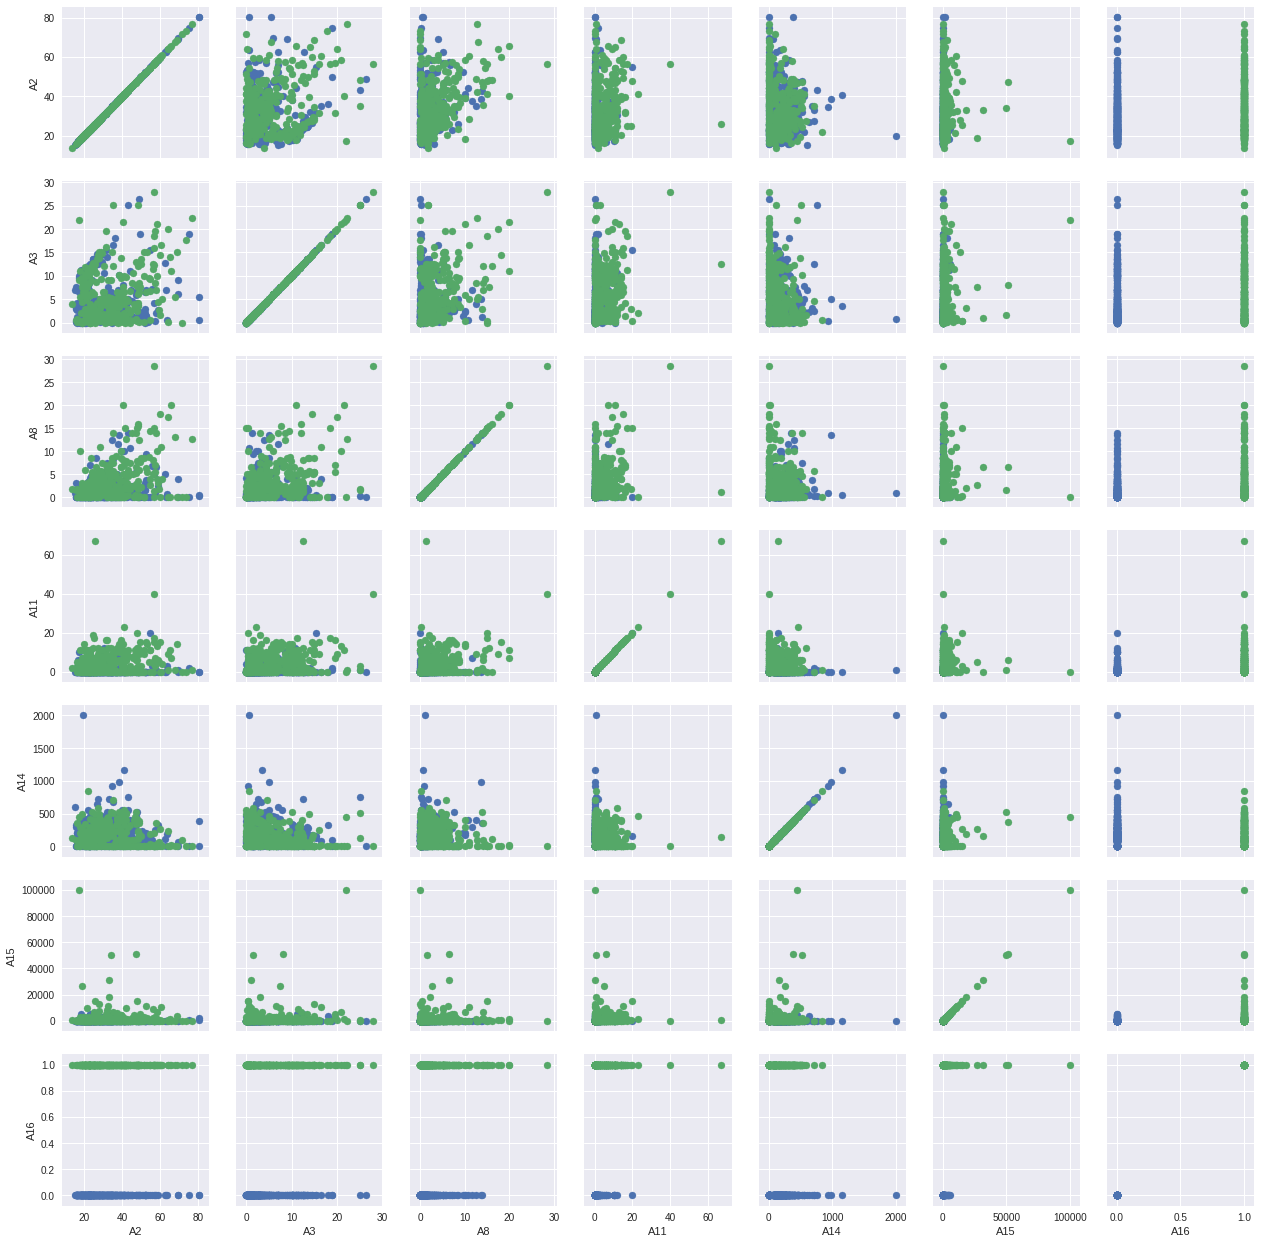

In [54]:
g = sns.PairGrid(data=df, hue='A16')
g.map(plt.scatter)

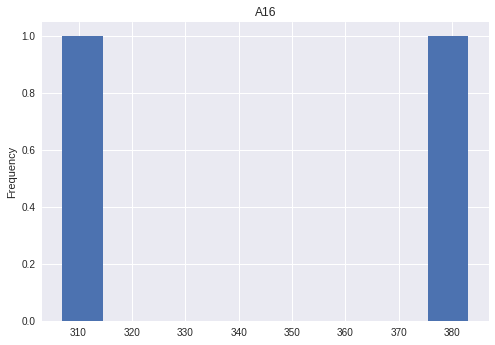

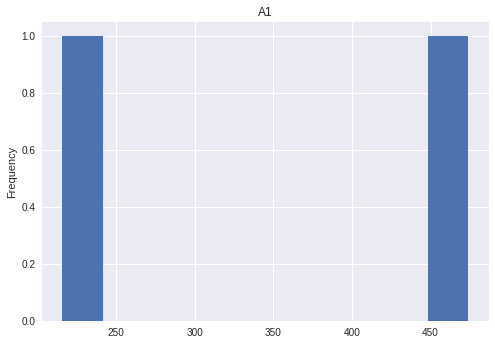

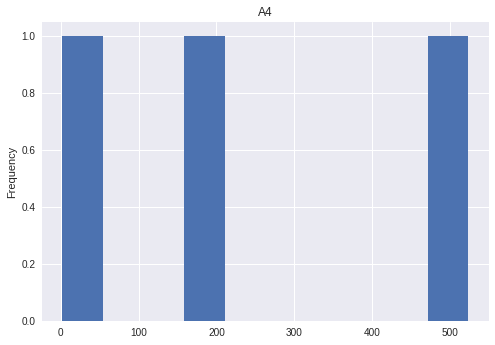

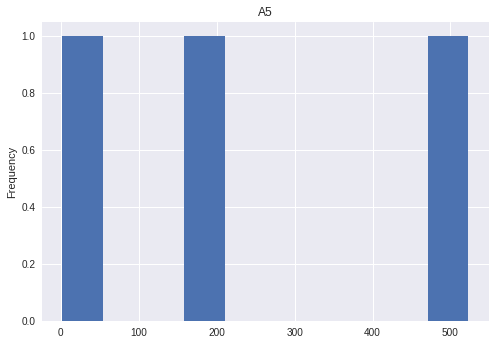

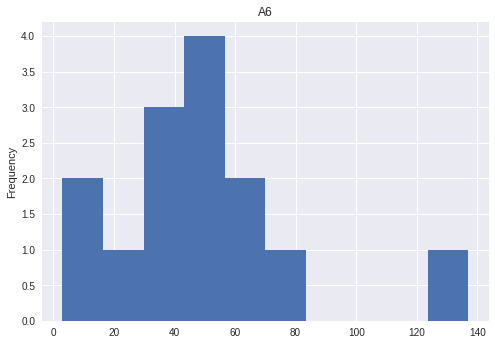

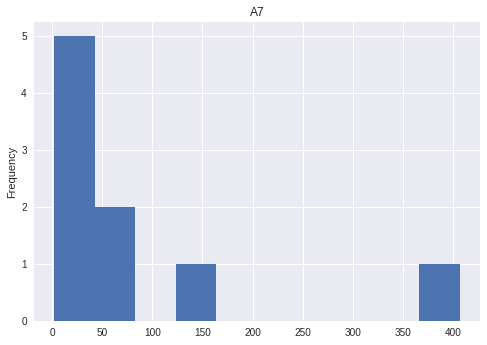

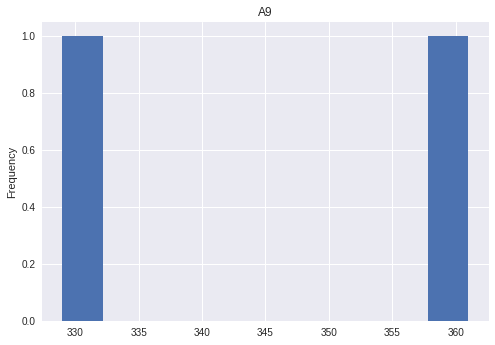

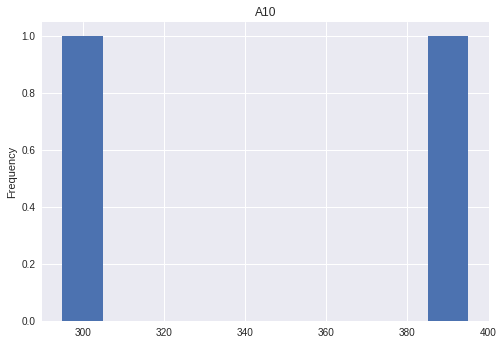

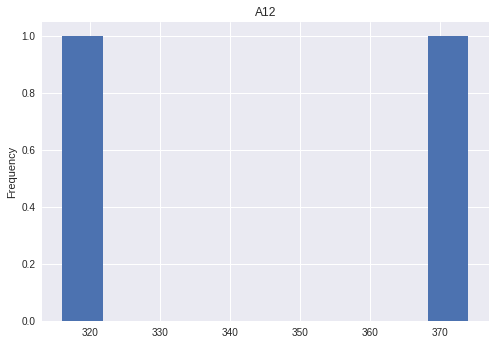

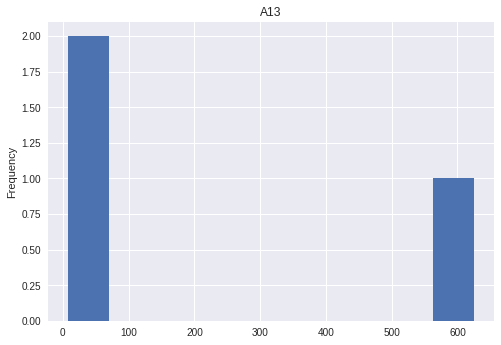

In [67]:
# I'm wrong...these don't produce much of interest
for i in categorical_col_list:
  df_categorical[i].value_counts().plot(kind='hist')
  plt.title(i)
  plt.show()

In [78]:
# Continuous tests
for col in continuous_col_list[1:]:
  t_stat, p_val = stats.ttest_ind(df_continuous_acc[col],
                                  df_continuous_rej[col],
                                  equal_var = False)
  print(col, "has t-statistic =", t_stat, "and pvalue =", p_val, "when comparing accepted vs rejected")


A2 has t-statistic = 4.152740636486119 and pvalue = 3.751707252379698e-05 when comparing accepted vs rejected
A3 has t-statistic = 5.392530906223675 and pvalue = 1.0158807568737146e-07 when comparing accepted vs rejected
A8 has t-statistic = 8.38006008674286 and pvalue = 7.425348666782441e-16 when comparing accepted vs rejected
A11 has t-statistic = 10.6384190682749 and pvalue = 4.310254123415665e-23 when comparing accepted vs rejected
A14 has t-statistic = -2.6966924711429936 and pvalue = 0.007176339456028075 when comparing accepted vs rejected
A15 has t-statistic = 4.196600236397611 and pvalue = 3.5433798702024966e-05 when comparing accepted vs rejected


In [87]:
# Categorical tests
df_categorical.sample(11)
for col in categorical_col_list[1:]:
  xtab = pd.crosstab(df_categorical["A16"], df_categorical[col])
  ar = np.array(xtab).T
  chi_stat, p_val = chisquare(ar, axis=None)
  print(col, "has chi statistic", chi_stat, "and p_value", p_val)


A1 has chi statistic 107.64637681159421 and p_value 3.522132844308837e-23
A4 has chi statistic 644.6608695652174 and p_value 4.513423235115485e-137
A5 has chi statistic 639.7913043478261 and p_value 5.0932454456708715e-136
A6 has chi statistic 385.60579710144935 and p_value 4.231522219000745e-65
A7 has chi statistic 1899.7565217391302 and p_value 0.0
A9 has chi statistic 357.82608695652175 and p_value 3.01326407188219e-77
A10 has chi statistic 173.1304347826087 and p_value 2.6842170765821316e-37
A12 has chi statistic 14.382608695652173 and p_value 0.0024280203352694887
A13 has chi statistic 1037.2695652173913 and p_value 5.124924990548949e-222


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

**T-tests**

I ran stats.ttest_ind() on all the continuous variables, comparing accepteds (col A16 = '+') vs rejecteds('-'). The best I can say is that :

A14 , with t-statistic = -2.696 and pvalue = 0.007 have a slight relationship, but with the pvalue < .01, still not enough to reject the hypothesis that they are independent

A11, with t-statistic = 10.638 and pvalue = pvalue = 4.310e-23 is the most dependent

A8, with t-statistic = 8.380 and pvalue = pvalue = 7.425e-16 also makes a lot of difference are accepted or rejected

Essentially all six continuous variables to a lesser or greater degree make a difference whether one was accepted or rejected. Inspecting the data seems to confirm a relationship between wherther one was accepted or rejected for columns A8, A11 and A15. These have rejected means of 1.257, 0.631 and 198.605, and accepted means of 3.427, 4.605 and 2038.859, respectively

**Chi-squared tests**

I ran scipy.stats.chisquare() on all the categorical variables

A12 had the lowest statistic (14.382) and p_value 0.002

A13 had the highest statistic (1037.269) and p_value 5.124e-222

A7 has chi statistic 1899.7565217391302, but p_value = 0.0, which is very weird

Looking at the data, it appears that for columns A9 and, to a lesser degree, A10 (both binary t/f items) make a difference as whether one is accepted or rejected. For A9, 306 of 383 rejects had a value of 'f', whereas 284 of 307 accepts had a value of 't'. For A10 the comparative figures are 'f': 297/383 for rejects and 't': 209/307 for accepts.

**What was the most challenging part of this sprint challenge?**

Realizing that data without context is a pain. For example, I suspect A1 is sex, A2 is age, A14 is level of debt and A15 level of assets or income. Also, I didn't feel I got much intelligence - no comments from the peanut gallery, please - from the ChiSq tests.